# Stage 1. Import Important Libraries and Data Set
This step involves the inclusion of crucial libraries to provide support for the machine learning technique called "Naive Bayes."

In [1]:
import pandas as pd

from sklearn.feature_selection import SelectPercentile, mutual_info_classif
import math

# Stage 2. Data Exploration
In this step, our objective is to ensure the proper loading and reading of the dataset by the system utilizing the pandas library.

In [2]:
def read_csv(path, columns_to_ignore):
    data = pd.read_csv(path, delimiter=";", usecols=lambda col: col not in columns_to_ignore)
    return pd.DataFrame(data)

In [3]:
columnsToIgnore = ["J", "S'_wave", "CB", "CD", "CS", "EV", "EY", "FF", "FH", "FJ", "FL", "FS", "FZ", "GA", "GH", "IB",
                   "KP", "LC", "T", "P", "QRST", "J", "heart_rate"]  # Removing unnecessary columns

dataTrain = read_csv('docs/dataRil.csv', columnsToIgnore)
dataTest = read_csv('docs/data_arrhythmia_test.csv', columnsToIgnore)

In [4]:
dataTrain.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.302434,-0.278982,9.048009,-1.457301,0.003982,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.603551,0.548876,3.472862,2.002430,0.050118,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-5.600000,-4.100000,0.000000,-28.600000,0.000000,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.500000,-0.425000,6.600000,-2.100000,0.000000,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,-0.200000,0.000000,8.800000,-1.100000,0.000000,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,0.000000,11.200000,0.000000,0.000000,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,2.700000,0.000000,23.600000,0.000000,0.800000,2.400000,6.000000,88.800000,115.900000,16.000000


In [5]:
dataTest.describe()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.0,10.000000,10.00000,10.00000,10.000000,10.000000
mean,37.700000,0.300000,140.90000,50.100000,137.500000,255.600000,333.400000,250.800000,91.300000,-20.100000,...,-1.600000,-1.900000,14.700000,-14.500000,0.0,1.200000,-2.40000,38.10000,25.800000,9.500000
std,25.863101,0.483046,26.11279,20.283819,33.715311,166.858023,55.307625,87.128003,68.441459,87.922251,...,2.412928,1.197219,5.334375,7.230337,0.0,0.788811,2.54733,35.23398,54.104426,4.624812
min,7.000000,0.000000,106.00000,17.000000,95.000000,72.000000,258.000000,120.000000,15.000000,-136.000000,...,-5.000000,-3.000000,5.000000,-27.000000,0.0,0.000000,-6.00000,-37.00000,-36.000000,3.000000
25%,11.750000,0.000000,118.75000,36.750000,116.250000,142.000000,290.750000,200.750000,27.500000,-82.750000,...,-3.500000,-3.000000,11.000000,-17.000000,0.0,1.000000,-4.50000,25.00000,-24.000000,5.750000
50%,42.000000,0.000000,147.50000,52.500000,125.000000,189.000000,332.500000,256.500000,80.000000,-27.000000,...,-1.500000,-2.000000,15.500000,-15.000000,0.0,1.000000,-3.00000,46.00000,24.500000,8.500000
75%,57.250000,0.750000,158.75000,68.000000,169.500000,400.750000,357.250000,310.250000,155.500000,27.750000,...,0.750000,-1.250000,18.750000,-10.500000,0.0,2.000000,-0.25000,63.75000,62.500000,14.000000
max,74.000000,1.000000,176.00000,73.000000,188.000000,507.000000,429.000000,381.000000,183.000000,145.000000,...,1.000000,0.000000,22.000000,-4.000000,0.0,2.000000,1.00000,75.00000,115.000000,16.000000


In [6]:
dataTrain.shape

(452, 258)

## Finding Missing Data

In [7]:
missing_data = pd.DataFrame(
    {'total null': dataTrain.isnull().sum(), 'null percentage': ((dataTrain.isnull().sum() / dataTrain.shape[0]) * 100)}
)
missing_data

,total null,null percentage
age,0,0.0
sex,0,0.0
height,0,0.0
weight,0,0.0
qrs_duration,0,0.0
...,...,...
LD,0,0.0
LE,0,0.0
LF,0,0.0
LG,0,0.0


# Data Visualize

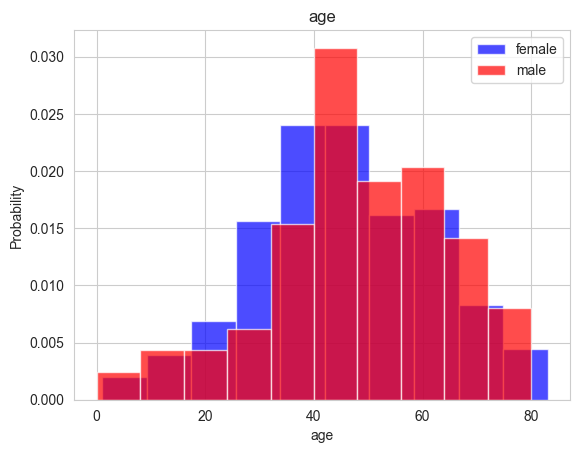

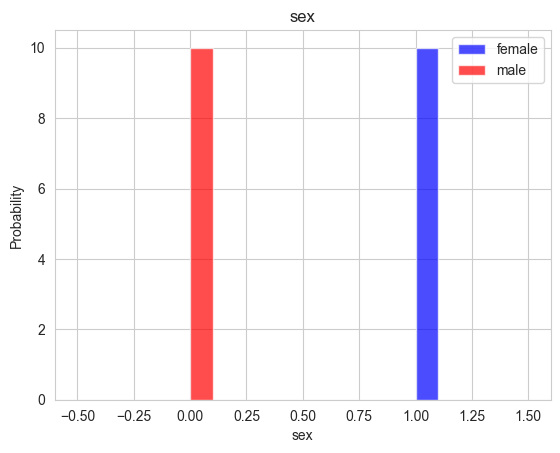

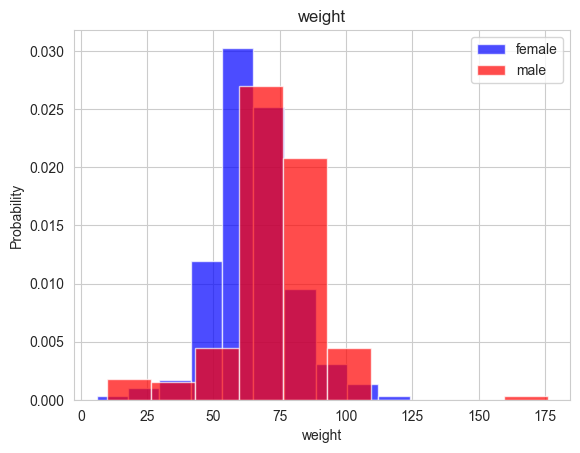

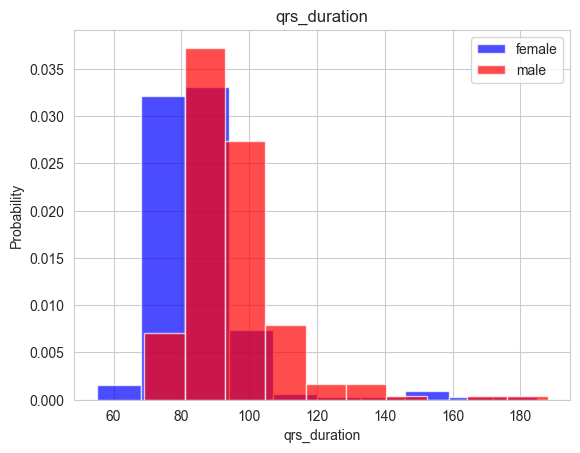

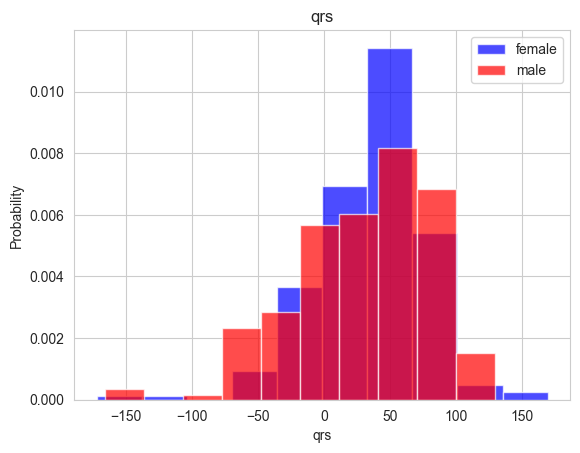

In [8]:
from matplotlib import pyplot as plt

sample_column = ['age', 'sex', 'weight', 'qrs_duration', 'qrs', 'diagnosis']
for label in sample_column[:-1]:
    plt.hist(dataTrain[dataTrain["sex"] == 1][label], color='blue', label='female', alpha=0.7, density=True)
    plt.hist(dataTrain[dataTrain["sex"] == 0][label], color='red', label='male', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

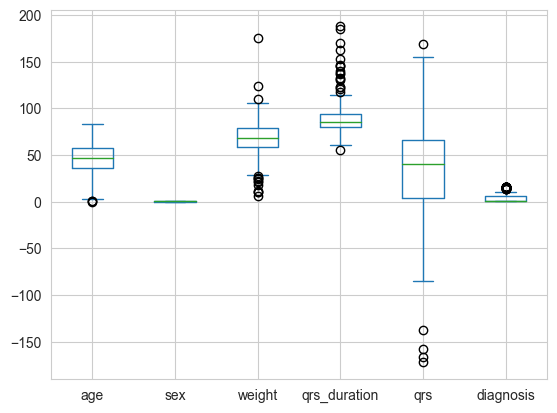

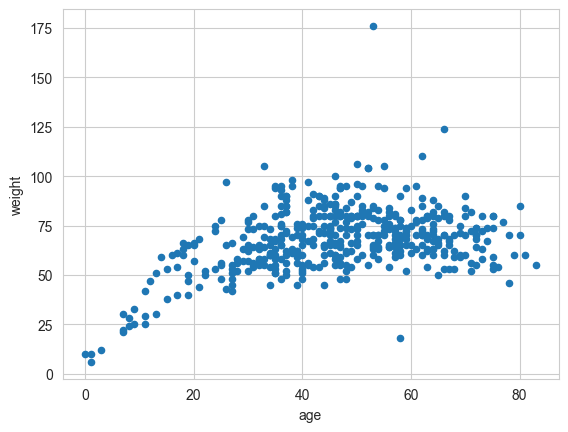

In [9]:
dataTrain[sample_column].plot(kind='box')
dataTrain.plot.scatter(x='age', y='weight')
plt.show()

# Stage 3. Pre-Processing

In [10]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 258 entries, age to diagnosis
dtypes: float64(116), int64(142)
memory usage: 911.2 KB


## IQR Remove Outliers

In [11]:
X = dataTrain.drop("diagnosis", axis=1)
y = dataTrain["diagnosis"]
percentile = 10

selector = SelectPercentile(score_func=mutual_info_classif, percentile=percentile)
X_new = selector.fit_transform(X, y)

selected_feature_indices = selector.get_support(indices=True)
selected_features = X.iloc[:, selected_feature_indices]
selected_features.loc[:, "diagnosis"] = y.values

q1 = dataTrain.quantile(.25)
q3 = dataTrain.quantile(.75)
iqr = q3 - q1

mask = (dataTrain < (q1 - 1.5 * iqr)) | (dataTrain > (q3 + 1.5 * iqr))
df_masked = dataTrain.mask(mask)
df_cleaned = df_masked.fillna(dataTrain.mean())

C:\Users\IKHSAN PC\AppData\Local\Temp\ipykernel_18496\1693948831.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.loc[:, "diagnosis"] = y.values


In [12]:
selected_features

,qrs_duration,AA,BI,BN,BY,CC,DA,DM,DP,EB,...,JB,JL,JP,JR,KC,KS,KU,LE,LG,diagnosis
0,91,32,52,0,56,32,0,52,28,48,...,-24.0,-12.6,8.4,-10.0,15.2,3.9,62.9,2.9,49.4,8
1,81,24,48,0,44,24,52,52,20,48,...,-21.6,-16.4,5.8,-7.7,9.5,2.6,43.4,2.1,38.8,6
2,138,24,52,88,36,24,36,28,96,20,...,18.7,20.9,5.8,-4.1,10.0,3.4,48.2,3.4,49.0,10
3,100,48,64,72,60,44,0,44,20,40,...,-18.2,-12.7,9.0,-7.9,15.0,3.0,68.0,2.6,61.6,1
4,88,28,48,56,48,28,0,52,28,48,...,-25.0,-12.4,8.5,-10.2,15.2,2.9,48.9,3.9,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,80,28,40,48,52,28,0,56,8,52,...,-18.6,-22.5,1.3,-9.2,2.9,1.0,-0.6,0.6,-0.5,1
448,100,24,48,56,0,0,0,44,20,24,...,-5.3,-14.3,12.2,-5.4,22.5,3.7,82.5,2.4,62.4,10
449,108,40,36,52,52,48,16,28,60,68,...,23.1,72.9,18.3,-34.1,20.6,-2.5,-63.6,1.0,-33.2,2
450,93,32,72,0,64,12,52,44,20,40,...,-28.7,-16.8,8.8,-7.7,11.9,3.2,61.0,2.4,46.6,1


In [13]:
df_cleaned.shape

(452, 258)

In [14]:
df_cleaned

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,75.0,0,166.188053,80.0,91.000000,193.0,371.0,174.0,121.000000,-16.0,...,-0.300000,0.0,9.0,-0.900000,0.0,0.900000,2.9,23.300000,49.40000,8.0
1,56.0,1,165.000000,64.0,81.000000,174.0,401.0,149.0,90.004425,25.0,...,-0.500000,0.0,8.5,0.000000,0.0,0.200000,2.1,20.400000,38.80000,6.0
2,54.0,0,172.000000,95.0,88.920354,163.0,386.0,185.0,102.000000,96.0,...,-0.302434,0.0,9.5,-2.400000,0.0,0.300000,3.4,12.300000,49.00000,10.0
3,55.0,0,175.000000,94.0,100.000000,202.0,380.0,179.0,90.004425,28.0,...,0.100000,0.0,12.2,-2.200000,0.0,0.400000,2.6,34.600000,61.60000,1.0
4,75.0,0,166.188053,80.0,88.000000,181.0,360.0,177.0,103.000000,-16.0,...,-0.400000,0.0,13.1,-3.600000,0.0,0.514823,3.9,25.400000,62.80000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1,160.000000,70.0,80.000000,199.0,382.0,154.0,117.000000,-37.0,...,0.000000,0.0,4.3,-5.000000,0.0,0.700000,0.6,-4.400000,-0.50000,1.0
448,37.0,0,166.188053,85.0,100.000000,137.0,361.0,201.0,73.000000,86.0,...,-0.500000,0.0,15.6,-1.600000,0.0,0.400000,2.4,38.000000,62.40000,10.0
449,36.0,0,166.000000,68.0,108.000000,176.0,365.0,194.0,116.000000,-85.0,...,-0.302434,0.0,16.3,-1.457301,0.0,0.514823,1.0,19.326106,29.47323,2.0
450,32.0,1,155.000000,55.0,93.000000,106.0,386.0,218.0,63.000000,54.0,...,0.200000,-0.4,12.0,-0.700000,0.0,0.500000,2.4,25.000000,46.60000,1.0


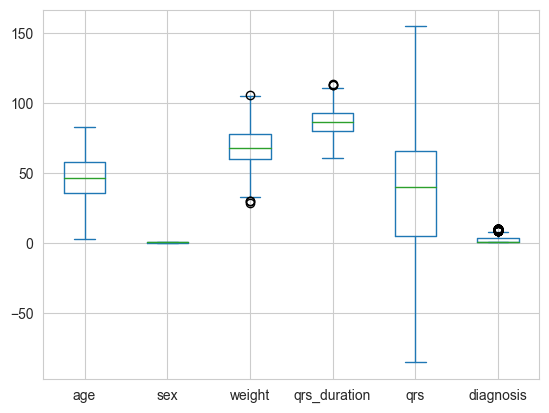

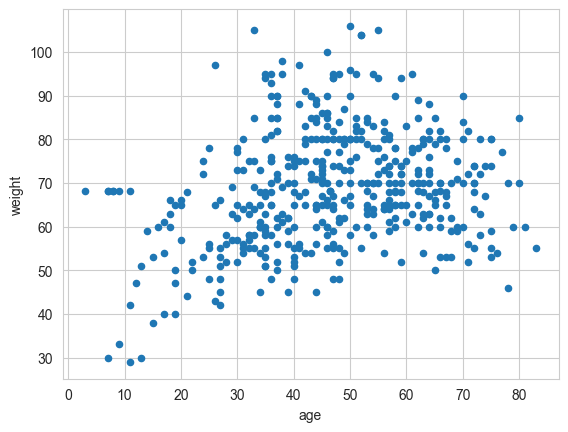

In [15]:
df_cleaned[sample_column].plot(kind='box')
df_cleaned.plot.scatter(x='age', y='weight')
plt.show()

In [16]:
df_cleaned

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,75.0,0,166.188053,80.0,91.000000,193.0,371.0,174.0,121.000000,-16.0,...,-0.300000,0.0,9.0,-0.900000,0.0,0.900000,2.9,23.300000,49.40000,8.0
1,56.0,1,165.000000,64.0,81.000000,174.0,401.0,149.0,90.004425,25.0,...,-0.500000,0.0,8.5,0.000000,0.0,0.200000,2.1,20.400000,38.80000,6.0
2,54.0,0,172.000000,95.0,88.920354,163.0,386.0,185.0,102.000000,96.0,...,-0.302434,0.0,9.5,-2.400000,0.0,0.300000,3.4,12.300000,49.00000,10.0
3,55.0,0,175.000000,94.0,100.000000,202.0,380.0,179.0,90.004425,28.0,...,0.100000,0.0,12.2,-2.200000,0.0,0.400000,2.6,34.600000,61.60000,1.0
4,75.0,0,166.188053,80.0,88.000000,181.0,360.0,177.0,103.000000,-16.0,...,-0.400000,0.0,13.1,-3.600000,0.0,0.514823,3.9,25.400000,62.80000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53.0,1,160.000000,70.0,80.000000,199.0,382.0,154.0,117.000000,-37.0,...,0.000000,0.0,4.3,-5.000000,0.0,0.700000,0.6,-4.400000,-0.50000,1.0
448,37.0,0,166.188053,85.0,100.000000,137.0,361.0,201.0,73.000000,86.0,...,-0.500000,0.0,15.6,-1.600000,0.0,0.400000,2.4,38.000000,62.40000,10.0
449,36.0,0,166.000000,68.0,108.000000,176.0,365.0,194.0,116.000000,-85.0,...,-0.302434,0.0,16.3,-1.457301,0.0,0.514823,1.0,19.326106,29.47323,2.0
450,32.0,1,155.000000,55.0,93.000000,106.0,386.0,218.0,63.000000,54.0,...,0.200000,-0.4,12.0,-0.700000,0.0,0.500000,2.4,25.000000,46.60000,1.0


In [17]:
selected_features

,qrs_duration,AA,BI,BN,BY,CC,DA,DM,DP,EB,...,JB,JL,JP,JR,KC,KS,KU,LE,LG,diagnosis
0,91,32,52,0,56,32,0,52,28,48,...,-24.0,-12.6,8.4,-10.0,15.2,3.9,62.9,2.9,49.4,8
1,81,24,48,0,44,24,52,52,20,48,...,-21.6,-16.4,5.8,-7.7,9.5,2.6,43.4,2.1,38.8,6
2,138,24,52,88,36,24,36,28,96,20,...,18.7,20.9,5.8,-4.1,10.0,3.4,48.2,3.4,49.0,10
3,100,48,64,72,60,44,0,44,20,40,...,-18.2,-12.7,9.0,-7.9,15.0,3.0,68.0,2.6,61.6,1
4,88,28,48,56,48,28,0,52,28,48,...,-25.0,-12.4,8.5,-10.2,15.2,2.9,48.9,3.9,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,80,28,40,48,52,28,0,56,8,52,...,-18.6,-22.5,1.3,-9.2,2.9,1.0,-0.6,0.6,-0.5,1
448,100,24,48,56,0,0,0,44,20,24,...,-5.3,-14.3,12.2,-5.4,22.5,3.7,82.5,2.4,62.4,10
449,108,40,36,52,52,48,16,28,60,68,...,23.1,72.9,18.3,-34.1,20.6,-2.5,-63.6,1.0,-33.2,2
450,93,32,72,0,64,12,52,44,20,40,...,-28.7,-16.8,8.8,-7.7,11.9,3.2,61.0,2.4,46.6,1


In [18]:
def normalization(all_data):
    for column in all_data.columns:
        if column != "diagnosis":
            all_data[column] = (all_data[column] - all_data[column].min()) / (
                    all_data[column].max() - all_data[column].min())
    return all_data

In [19]:
normTrain = normalization(selected_features.copy())

In [20]:
normTrain

,qrs_duration,AA,BI,BN,BY,CC,DA,DM,DP,EB,...,JB,JL,JP,JR,KC,KS,KU,LE,LG,diagnosis
0,0.270677,0.32,0.382353,0.000000,0.378378,0.333333,0.000000,0.481481,0.291667,0.428571,...,0.395958,0.554982,0.295775,0.793388,0.417582,0.669173,0.660574,0.741667,0.569579,8
1,0.195489,0.24,0.352941,0.000000,0.297297,0.250000,0.448276,0.481481,0.208333,0.428571,...,0.400907,0.543439,0.204225,0.840909,0.260989,0.571429,0.558747,0.675000,0.500971,6
2,0.624060,0.24,0.382353,0.956522,0.243243,0.250000,0.310345,0.259259,1.000000,0.178571,...,0.484017,0.656744,0.204225,0.915289,0.274725,0.631579,0.583812,0.783333,0.566990,10
3,0.338346,0.48,0.470588,0.782609,0.405405,0.458333,0.000000,0.407407,0.208333,0.357143,...,0.407919,0.554678,0.316901,0.836777,0.412088,0.601504,0.687206,0.716667,0.648544,1
4,0.248120,0.28,0.352941,0.608696,0.324324,0.291667,0.000000,0.481481,0.291667,0.428571,...,0.393896,0.555589,0.299296,0.789256,0.417582,0.593985,0.587467,0.825000,0.656311,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.187970,0.28,0.294118,0.521739,0.351351,0.291667,0.000000,0.518519,0.083333,0.464286,...,0.407094,0.524909,0.045775,0.809917,0.079670,0.451128,0.328982,0.550000,0.246602,1
448,0.338346,0.24,0.352941,0.608696,0.000000,0.000000,0.000000,0.407407,0.208333,0.214286,...,0.434523,0.549818,0.429577,0.888430,0.618132,0.654135,0.762924,0.700000,0.653722,10
449,0.398496,0.40,0.264706,0.565217,0.351351,0.500000,0.137931,0.259259,0.625000,0.607143,...,0.493091,0.814702,0.644366,0.295455,0.565934,0.187970,0.000000,0.583333,0.034951,2
450,0.285714,0.32,0.529412,0.000000,0.432432,0.125000,0.448276,0.407407,0.208333,0.357143,...,0.386265,0.542224,0.309859,0.840909,0.326923,0.616541,0.650653,0.700000,0.551456,1


In [21]:
norm_train_df_cleaned = normalization(df_cleaned.copy())

In [22]:
norm_train_df_cleaned

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,0.9000,0.0,0.517642,0.662338,0.566038,0.743802,0.526316,0.564103,0.864198,0.287500,...,0.473684,1.0,0.520231,0.826923,0.0,0.818182,0.774194,0.573214,0.732123,8.0
1,0.6625,1.0,0.487179,0.454545,0.377358,0.586777,0.751880,0.350427,0.481536,0.458333,...,0.368421,1.0,0.491329,1.000000,0.0,0.181818,0.645161,0.521429,0.611805,6.0
2,0.6375,0.0,0.666667,0.857143,0.526799,0.495868,0.639098,0.658120,0.629630,0.754167,...,0.472403,1.0,0.549133,0.538462,0.0,0.272727,0.854839,0.376786,0.727582,10.0
3,0.6500,0.0,0.743590,0.844156,0.735849,0.818182,0.593985,0.606838,0.481536,0.470833,...,0.684211,1.0,0.705202,0.576923,0.0,0.363636,0.725806,0.775000,0.870602,1.0
4,0.9000,0.0,0.517642,0.662338,0.509434,0.644628,0.443609,0.589744,0.641975,0.287500,...,0.421053,1.0,0.757225,0.307692,0.0,0.468021,0.935484,0.610714,0.884222,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,0.6250,1.0,0.358974,0.532468,0.358491,0.793388,0.609023,0.393162,0.814815,0.200000,...,0.631579,1.0,0.248555,0.038462,0.0,0.636364,0.403226,0.078571,0.165721,1.0
448,0.4250,0.0,0.517642,0.727273,0.735849,0.280992,0.451128,0.794872,0.271605,0.712500,...,0.368421,1.0,0.901734,0.692308,0.0,0.363636,0.693548,0.835714,0.879682,10.0
449,0.4125,0.0,0.512821,0.506494,0.886792,0.603306,0.481203,0.735043,0.802469,0.000000,...,0.472403,1.0,0.942197,0.719750,0.0,0.468021,0.467742,0.502252,0.505939,2.0
450,0.3625,1.0,0.230769,0.337662,0.603774,0.024793,0.639098,0.940171,0.148148,0.579167,...,0.736842,0.6,0.693642,0.865385,0.0,0.454545,0.693548,0.603571,0.700341,1.0


# Stage 4. Naïve Bayes Classifier

In [23]:
def calc_probability(mean, std, x):
    if std == 0:
        if x == mean:
            return 1.0
        else:
            return 0.0
    else:
        exponent = math.exp(-((x - mean) ** 2) / (2 * std ** 2))
        return (1 / (math.sqrt(2 * math.pi) * std)) * exponent

In [24]:
def splitTruth(dataTrain, columnTarget):
    unique_diagnosis = sorted(dataTrain[columnTarget].unique())
    truthData = {}
    for truth in unique_diagnosis:
        truthData[truth] = dataTrain[dataTrain[columnTarget] == truth]
    return truthData


diagnosis_data_normTrain = splitTruth(normTrain, "diagnosis")
diagnosis_data_dfCleaned = splitTruth(df_cleaned, "diagnosis")

In [25]:
for diagnosis, df in diagnosis_data_normTrain.items():
    print(f"Diagnosis {diagnosis} data:")
    print(df)
    print()

Diagnosis 1 data:
     qrs_duration    AA        BI        BN        BY        CC        DA  \
3        0.338346  0.48  0.470588  0.782609  0.405405  0.458333  0.000000   
6        0.165414  0.24  0.323529  0.521739  0.000000  0.000000  0.482759   
7        0.172932  0.24  0.352941  0.608696  0.000000  0.000000  0.379310   
8        0.218045  0.20  0.294118  0.478261  0.000000  0.000000  0.482759   
11       0.165414  0.20  0.294118  0.521739  0.270270  0.208333  0.379310   
..            ...   ...       ...       ...       ...       ...       ...   
445      0.270677  0.20  0.235294  0.434783  0.000000  0.000000  0.517241   
446      0.195489  0.28  0.382353  0.608696  0.270270  0.375000  0.517241   
447      0.187970  0.28  0.294118  0.521739  0.351351  0.291667  0.000000   
450      0.285714  0.32  0.529412  0.000000  0.432432  0.125000  0.448276   
451      0.180451  0.24  0.352941  0.565217  0.243243  0.375000  0.344828   

           DM        DP        EB  ...        JB        J

In [26]:
for diagnosis, df in diagnosis_data_dfCleaned.items():
    print(f"Diagnosis {diagnosis} data:")
    print(df)
    print()

Diagnosis 1.0 data:
      age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
3    55.0    0   175.0    94.0         100.0    202.000000         380.0   
6    40.0    1   160.0    52.0          77.0    129.000000         377.0   
7    49.0    1   162.0    54.0          78.0    155.152655         376.0   
8    44.0    0   168.0    56.0          84.0    118.000000         354.0   
11   45.0    1   165.0    86.0          77.0    143.000000         373.0   
..    ...  ...     ...     ...           ...           ...           ...   
445  45.0    0   175.0    75.0          91.0    134.000000         376.0   
446  20.0    1   157.0    57.0          81.0    151.000000         363.0   
447  53.0    1   160.0    70.0          80.0    199.000000         382.0   
450  32.0    1   155.0    55.0          93.0    106.000000         386.0   
451  78.0    1   160.0    70.0          79.0    127.000000         364.0   

     t_interval  p_interval   qrs  ...   KV   KY    KZ   LA   LB   

In [27]:
def find_mean(diagnosis_data):
    class_means = {}
    for diagnosis, data in diagnosis_data.items():
        class_means[diagnosis] = data.mean()
    return class_means


class_means_normTrain = find_mean(diagnosis_data_normTrain)
class_means_dfCleaned = find_mean(diagnosis_data_dfCleaned)

In [28]:
class_means_normTrain

{1: qrs_duration    0.220132
 AA              0.290939
 BI              0.342137
 BN              0.311269
 BY              0.278434
 CC              0.256463
 DA              0.396622
 DM              0.420408
 DP              0.221259
 EB              0.359621
 EF              0.323191
 FC              0.342377
 GJ              0.808855
 GU              0.521217
 HR              0.238280
 HY              0.202538
 IV              0.001552
 JB              0.404956
 JL              0.546311
 JP              0.271055
 JR              0.810103
 KC              0.320554
 KS              0.530919
 KU              0.525755
 LE              0.633163
 LG              0.468846
 diagnosis       1.000000
 dtype: float64,
 2: qrs_duration    0.261791
 AA              0.318182
 BI              0.314171
 BN              0.253953
 BY              0.307125
 CC              0.286932
 DA              0.399687
 DM              0.435185
 DP              0.250947
 EB              0.424513
 EF            

In [29]:
class_means_dfCleaned

{1.0: age              46.273469
 sex               0.653061
 height          164.079854
 weight           68.646289
 qrs_duration     84.416001
                    ...    
 LD                0.562495
 LE                1.562631
 LF               19.794304
 LG               33.322230
 diagnosis         1.000000
 Length: 258, dtype: float64,
 2.0: age              51.750000
 sex               0.590909
 height          163.068182
 weight           69.962289
 qrs_duration     89.818182
                    ...    
 LD                0.536112
 LE               -0.167915
 LF               21.757412
 LG               15.219846
 diagnosis         2.000000
 Length: 258, dtype: float64,
 3.0: age              53.333333
 sex               0.000000
 height          170.600000
 weight           76.866667
 qrs_duration     93.333333
                    ...    
 LD                0.653333
 LE                0.694823
 LF                9.681740
 LG               16.531549
 diagnosis         3.000000
 

In [30]:
def find_std(diagnosis_data):
    class_std = {}
    for diagnosis, data in diagnosis_data.items():
        class_std[diagnosis] = data.std()
    return class_std


class_std_normTrain = find_std(diagnosis_data_normTrain)
class_std_dfCleaned = find_std(diagnosis_data_dfCleaned)

In [31]:
class_std_normTrain

{1: qrs_duration    0.065680
 AA              0.077022
 BI              0.162617
 BN              0.292679
 BY              0.137916
 CC              0.140087
 DA              0.180063
 DM              0.111762
 DP              0.075843
 EB              0.093597
 EF              0.081583
 FC              0.051026
 GJ              0.069579
 GU              0.087003
 HR              0.077587
 HY              0.170080
 IV              0.009509
 JB              0.020235
 JL              0.040148
 JP              0.153280
 JR              0.097554
 KC              0.133129
 KS              0.102944
 KU              0.112607
 LE              0.083631
 LG              0.104003
 diagnosis       0.000000
 dtype: float64,
 2: qrs_duration    0.076750
 AA              0.079512
 BI              0.187285
 BN              0.303109
 BY              0.097026
 CC              0.117238
 DA              0.192828
 DM              0.141118
 DP              0.152892
 EB              0.086189
 EF            

In [32]:
class_std_dfCleaned

{1.0: age             14.556092
 sex              0.476970
 height           7.528035
 weight          13.633331
 qrs_duration     8.536040
                   ...    
 LD               0.199874
 LE               0.936691
 LF              10.542253
 LG              15.154705
 diagnosis        0.000000
 Length: 258, dtype: float64,
 2.0: age             14.160418
 sex              0.497350
 height           7.456534
 weight          11.759838
 qrs_duration    10.207778
                   ...    
 LD               0.228948
 LE               1.031143
 LF              11.924472
 LG              14.322927
 diagnosis        0.000000
 Length: 258, dtype: float64,
 3.0: age             11.286317
 sex              0.000000
 height           4.579457
 weight          12.397388
 qrs_duration     9.131317
                   ...    
 LD               0.241622
 LE               0.747015
 LF              10.401603
 LG              14.737222
 diagnosis        0.000000
 Length: 258, dtype: float64,
 3.8

In [33]:
def doPrediction(class_means, class_std, target, truthColumn):
    result = []
    for i in range(len(target)):
        class_probabilities = {}
        for diagnosis, means in class_means.items():
            class_probabilities[diagnosis] = 1
            for column in target.columns:
                if column != truthColumn:
                    x = target[column].iloc[i]
                    class_probabilities[diagnosis] *= calc_probability(means[column], class_std[diagnosis][column], x)
        max_prob = max(class_probabilities.values())
        prediction = [diagnosis for diagnosis, prob in class_probabilities.items() if prob == max_prob][0]
        result.append({'ID': i, 'Prediction Result': prediction, 'Ground Truth': target[truthColumn].iloc[i]})

    return result

In [34]:
predictions_normTrain = doPrediction(class_means_normTrain, class_std_normTrain, normTrain, "diagnosis")


In [35]:
predictions_dfCleaned = doPrediction(class_means_dfCleaned, class_std_dfCleaned, df_cleaned, "diagnosis")


# Stage 5. Validating Model

In [36]:
def folding(dataset, trainingPercentage, location, shuffle: bool):
    lengthTraining = int(len(dataset) * trainingPercentage / 100)
    if (shuffle):
        dataset = dataset.sample(frac=1).reset_index(drop=True)
    train = []
    validation = []
    if location == 'left':
        train, validation = dataset.iloc[:lengthTraining].reset_index(drop=True), dataset.iloc[
                                                                                  lengthTraining:].reset_index(
            drop=True)
    elif location == 'right':
        validation, train = dataset.iloc[:abs(lengthTraining - len(dataset))].reset_index(drop=True), dataset.iloc[
                                                                                                      abs(lengthTraining - len(
                                                                                                          dataset)):].reset_index(
            drop=True)
    elif location == 'middle':
        train = dataset.iloc[
                int(abs(lengthTraining - len(dataset)) / 2):len(dataset) - int(abs(lengthTraining - len(dataset)) / 2)]
        validation = pd.concat([dataset.iloc[:int(abs(lengthTraining - len(dataset)) / 2)],
                                dataset.iloc[len(dataset) - int(abs(lengthTraining - len(dataset)) / 2):]])
    return train, validation

In [37]:
trainData, validationData = folding(df_cleaned.copy(), trainingPercentage=85, location='left', shuffle=True)

In [38]:
trainData

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,70.0,0,178.0,80.0,93.000000,118.000000,367.207965,155.0,82.0,-31.0,...,-0.302434,0.000000,15.7,-2.1,0.0,0.500000,-1.300000,32.600000,22.50000,1.0
1,45.0,0,177.0,72.0,94.000000,164.000000,431.000000,158.0,81.0,116.0,...,-0.302434,-0.278982,0.0,0.0,0.0,0.600000,1.222345,-8.300000,29.47323,3.0
2,35.0,1,160.0,53.0,88.920354,163.000000,340.000000,162.0,102.0,40.0,...,0.000000,0.000000,8.7,-0.5,0.0,0.500000,2.300000,20.900000,40.60000,1.0
3,26.0,1,160.0,65.0,71.000000,150.000000,350.000000,165.0,81.0,66.0,...,-0.300000,-0.400000,12.1,0.0,0.0,0.514823,2.500000,26.400000,43.40000,1.0
4,33.0,1,160.0,69.0,83.000000,174.000000,381.000000,125.0,83.0,69.0,...,-0.200000,0.000000,12.3,0.0,0.0,0.400000,1.100000,34.400000,41.20000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,39.0,1,155.0,59.0,91.000000,171.000000,387.000000,117.0,93.0,73.0,...,-0.100000,-0.278982,13.0,0.0,0.0,0.700000,0.900000,19.326106,53.30000,1.0
380,63.0,0,174.0,79.0,91.000000,151.000000,410.000000,198.0,86.0,16.0,...,-0.700000,0.000000,4.7,-1.5,0.0,0.400000,-1.400000,7.600000,-5.00000,2.0
381,46.0,0,177.0,90.0,100.000000,155.152655,380.000000,179.0,95.0,82.0,...,-0.200000,-0.278982,11.0,-2.3,0.0,0.514823,3.100000,14.700000,45.00000,1.0
382,34.0,1,159.0,68.0,80.000000,135.000000,379.000000,149.0,97.0,-14.0,...,-0.200000,0.000000,6.5,-3.1,0.0,0.700000,0.600000,8.800000,12.70000,1.0


In [39]:
validationData

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KV,KY,KZ,LA,LB,LD,LE,LF,LG,diagnosis
0,44.0,1,155.0,65.0,80.0,117.0,363.0,142.000000,72.000000,56.0,...,-0.2,0.0,6.2,0.000000,0.0,0.5,1.1,16.100000,23.8,1.000000
1,55.0,0,175.0,94.0,100.0,202.0,380.0,179.000000,90.004425,28.0,...,0.1,0.0,12.2,-2.200000,0.0,0.4,2.6,34.600000,61.6,1.000000
2,59.0,0,160.0,52.0,92.0,128.0,359.0,169.949115,69.000000,74.0,...,-0.9,-0.8,12.5,0.000000,0.0,0.5,-1.2,31.600000,18.0,2.000000
3,67.0,0,163.0,78.0,106.0,173.0,365.0,196.000000,82.000000,-73.0,...,0.5,0.0,4.2,-1.457301,0.0,0.4,0.8,19.326106,-2.1,8.000000
4,59.0,1,155.0,72.0,83.0,209.0,344.0,169.949115,105.000000,69.0,...,-1.0,-0.5,8.8,-1.800000,0.0,0.4,-1.2,14.000000,0.4,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,18.0,0,175.0,66.0,91.0,139.0,364.0,191.000000,87.000000,20.0,...,0.0,0.0,7.5,-0.400000,0.0,0.4,2.1,18.800000,38.5,3.880531
64,54.0,1,160.0,64.0,71.0,148.0,409.0,139.000000,93.000000,-5.0,...,-0.4,0.0,6.0,-0.900000,0.0,0.3,1.1,11.600000,17.9,6.000000
65,52.0,1,155.0,104.0,84.0,217.0,420.0,221.000000,117.000000,27.0,...,0.1,0.0,7.5,-3.600000,0.0,0.6,0.6,10.200000,16.4,1.000000
66,36.0,1,153.0,75.0,71.0,132.0,364.0,169.000000,82.000000,62.0,...,-0.1,0.0,8.9,-1.000000,0.0,0.5,1.7,19.700000,34.3,1.000000


In [40]:
splitTrain = splitTruth(trainData, "diagnosis")

In [41]:
splitTrain

{1.0:       age  sex  height  weight  qrs_duration  p-r_interval  q-t_interval  \
 0    70.0    0   178.0    80.0     93.000000    118.000000    367.207965   
 2    35.0    1   160.0    53.0     88.920354    163.000000    340.000000   
 3    26.0    1   160.0    65.0     71.000000    150.000000    350.000000   
 4    33.0    1   160.0    69.0     83.000000    174.000000    381.000000   
 5    36.0    0   185.0    95.0     96.000000    159.000000    330.000000   
 ..    ...  ...     ...     ...           ...           ...           ...   
 377  64.0    1   160.0    67.0     78.000000    162.000000    351.000000   
 379  39.0    1   155.0    59.0     91.000000    171.000000    387.000000   
 381  46.0    0   177.0    90.0    100.000000    155.152655    380.000000   
 382  34.0    1   159.0    68.0     80.000000    135.000000    379.000000   
 383  50.0    1   163.0    65.0     75.000000    151.000000    362.000000   
 
      t_interval  p_interval   qrs  ...        KV        KY    KZ   L

In [42]:
trainMeans = find_mean(splitTrain)

In [43]:
trainStd = find_std(splitTrain)

In [44]:
result = doPrediction(trainMeans, trainStd, trainData, "diagnosis")

In [45]:
result

[{'ID': 0, 'Prediction Result': 1.0, 'Ground Truth': 1.0},
 {'ID': 1, 'Prediction Result': 3.0, 'Ground Truth': 3.0},
 {'ID': 2, 'Prediction Result': 1.0, 'Ground Truth': 1.0},
 {'ID': 3, 'Prediction Result': 1.0, 'Ground Truth': 1.0},
 {'ID': 4, 'Prediction Result': 1.0, 'Ground Truth': 1.0},
 {'ID': 5, 'Prediction Result': 1.0, 'Ground Truth': 1.0},
 {'ID': 6, 'Prediction Result': 1.0, 'Ground Truth': 5.0},
 {'ID': 7, 'Prediction Result': 4.0, 'Ground Truth': 4.0},
 {'ID': 8, 'Prediction Result': 1.0, 'Ground Truth': 1.0},
 {'ID': 9, 'Prediction Result': 1.0, 'Ground Truth': 1.0},
 {'ID': 10, 'Prediction Result': 1.0, 'Ground Truth': 1.0},
 {'ID': 11, 'Prediction Result': 1.0, 'Ground Truth': 1.0},
 {'ID': 12, 'Prediction Result': 1.0, 'Ground Truth': 2.0},
 {'ID': 13, 'Prediction Result': 2.0, 'Ground Truth': 2.0},
 {'ID': 14, 'Prediction Result': 1.0, 'Ground Truth': 1.0},
 {'ID': 15, 'Prediction Result': 1.0, 'Ground Truth': 6.0},
 {'ID': 16, 'Prediction Result': 1.0, 'Ground Trut

In [46]:
def confussion_matrix(result, classes):
    TP = [0] * (classes + 1)
    TN = [0] * (classes + 1)
    FP = [0] * (classes + 1)
    FN = [0] * (classes + 1)

    x = True

    for i in result:
        if i['Ground Truth'] == '?':
            x = False
            break
        else:
            ground_truth = i['Ground Truth']
            prediction = i['Prediction Result']
            for class_index in range(classes + 1):
                if class_index == ground_truth and class_index == prediction:
                    TP[class_index] += 1
                elif class_index != ground_truth and class_index != prediction:
                    TN[class_index] += 1
                elif class_index != ground_truth and class_index == prediction:
                    FP[class_index] += 1
                elif class_index == ground_truth and class_index != prediction:
                    FN[class_index] += 1

    sumTP = sum(TP)
    sumTN = sum(TN)
    sumFP = sum(FP)
    sumFN = sum(FN)

    if (x):
        print(f"\nTP : {TP[1:]} TN : {TN[1:]}\nFP : {FP[1:]} FN : {FN[1:]}")
        print(f"Accuracy : {((sumTP + sumTN) / (sumTP + sumTN + sumFP + sumFN)) * 100}%")
        print(f"Precision : {(sumTP / (sumTP + sumFP)) * 100}%")
        print(f"Recall : {(sumTP / (sumTP + sumFN)) * 100}%")
    else:
        print("\nCannot process the confusion matrix with unknown Ground Truth!")
    print(sumFN + sumFP + sumTN + sumTP)

In [47]:
confussion_matrix(result, 16)


TP : [212, 10, 14, 2, 5, 0, 1, 0, 6, 13, 0, 0, 0, 0, 0, 0] TN : [58, 351, 369, 371, 370, 362, 381, 383, 377, 343, 384, 384, 384, 384, 384, 384]
FP : [114, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0] FN : [0, 22, 1, 11, 8, 22, 2, 1, 1, 27, 0, 0, 0, 0, 0, 0]
Accuracy : 96.75245098039215%
Precision : 69.21052631578948%
Recall : 73.46368715083798%
6528
